<a href="https://colab.research.google.com/github/sdw1621/tensorflow_hangi_uni/blob/main/fashion_minist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion MNIST CNN 모델

# Reference : tensorflow.org

import tensorflow as tf
from tensorflow import keras

print('TensorFlow version: {}'.format(tf.__version__))

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


TensorFlow version: 2.6.0
4431872/4422102 [==============================] - 0s 0us/step

train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


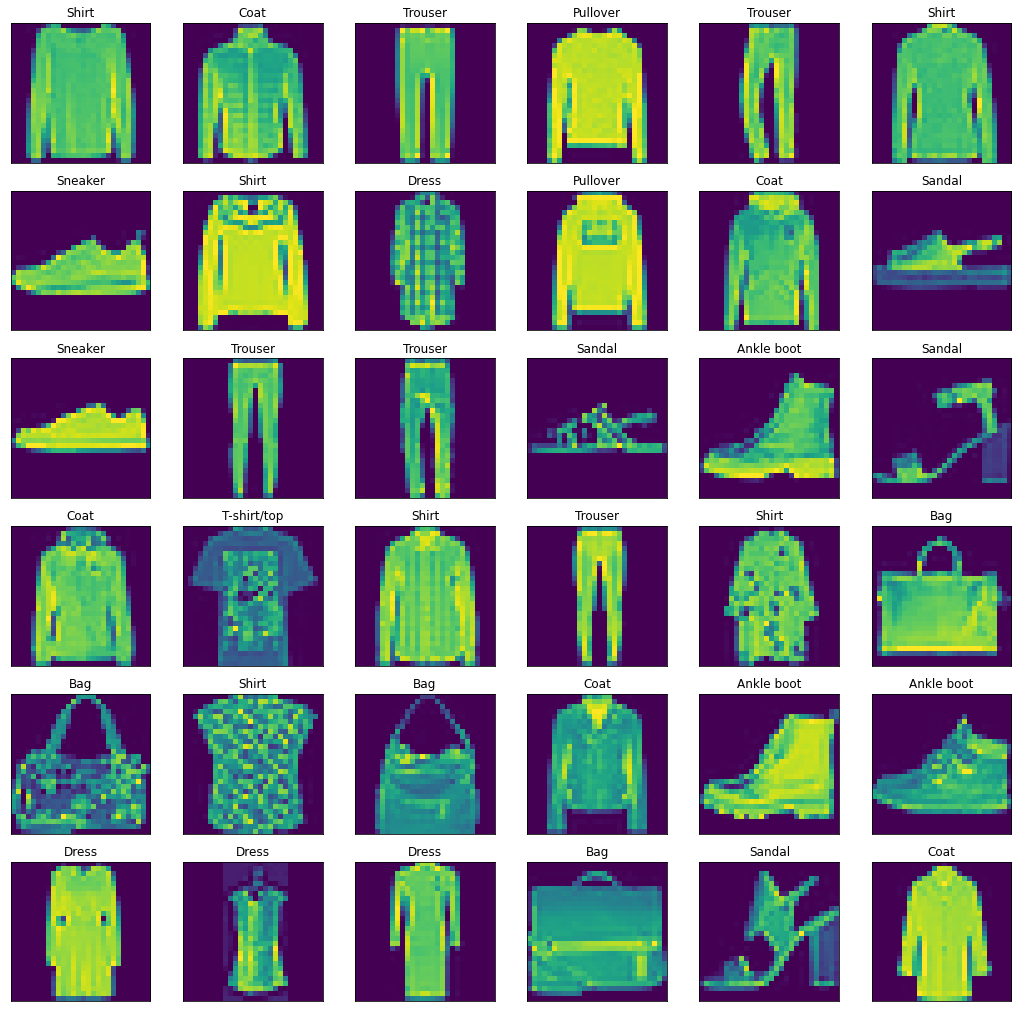

In [ ]:
# FASHION MINST 보기
import numpy as np
import matplotlib.pyplot as plt

# plot 18" x 18" 
fig = plt.figure(figsize=(18, 18))
for idx in range(36):
    id = np.random.randint(60000)
    number = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    number.imshow(np.squeeze(train_images[id])) #, cmap='gray')
    number.set_title(class_names[train_labels[id]])


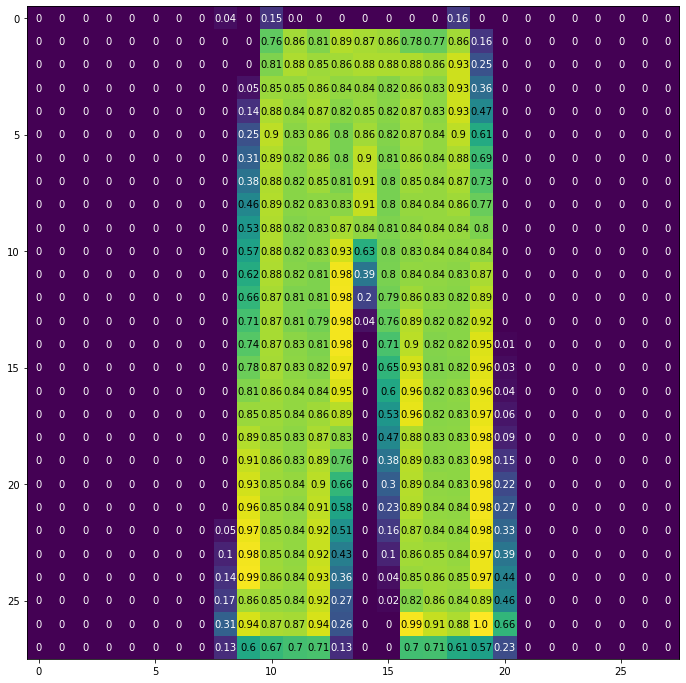

In [ ]:
# 이미지 데이터 상세
img = np.squeeze(train_images[143])

fig = plt.figure(figsize = (12,12)) 
big_number = fig.add_subplot(111)
big_number.imshow(img) #, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        big_number.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
        

In [ ]:
# MLP 모델 설계하기

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),   
  keras.layers.Dense(400, activation='relu'),
  keras.layers.Dense(100, activation='relu'),                     
  keras.layers.Dense(10, activation='softmax')
])

# 모델 프로파일
model.summary()

# 학습 기준 확정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# 학습 반복회수 설정
epochs = 5
num_batch = 128

# 학습 모델 학습
model.fit(train_images, train_labels, epochs=epochs, batch_size=num_batch)



Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4974 - accuracy: 0.8242
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3635 - accuracy: 0.8683
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3242 - accuracy: 0.8819
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3001 - accuracy: 0.8893
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2872 - accuracy: 0.8935


In [ ]:
# 학습모델 검증하기

score = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8749
Test loss: 0.3414182662963867 / Test accuracy: 0.8748999834060669


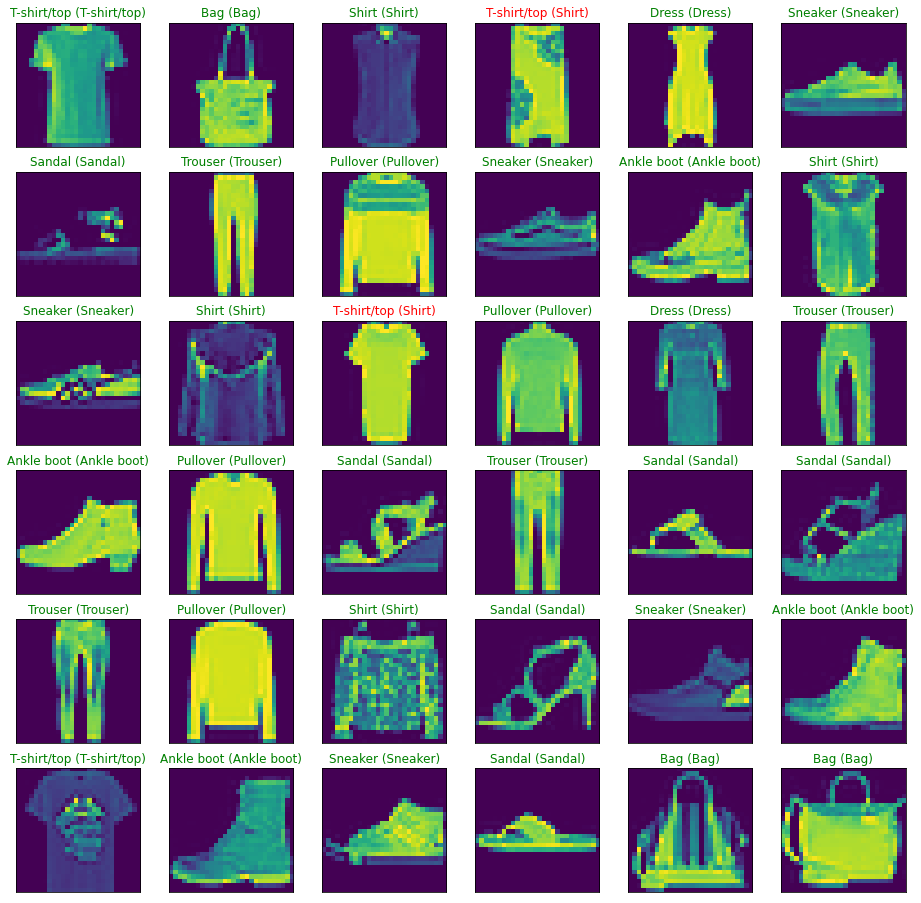

In [ ]:

# 예측 결과 확인해 보기

fig = plt.figure(figsize=(16, 16))
for idx in np.arange(36):
    id = np.random.randint(10000)
    image = np.expand_dims(test_images[id], axis=0)
    preds = np.argmax(model.predict(image))
    ax = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(image))#, cmap='gray')
    ax.set_title("{} ({})".format(class_names[preds], class_names[test_labels[id]]),
                 color=("green" if preds == test_labels[id] else "red"))

In [ ]:

# 학습모델 서빙 모델로 저장
import os

SAVED_MODEL_PATH = './saved_model'
MODEL_DIR = SAVED_MODEL_PATH

version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
  model,
  export_path,
  overwrite=True,
  include_optimizer=True,
  save_format=None,
  signatures=None,
  options=None
)
print('\nSaved model:')

export_path = ./saved_model/1

INFO:tensorflow:Assets written to: ./saved_model/1/assets

Saved model:
